In [28]:
import sqlite3
import pandas as pd
import seaborn as sns

In [29]:
conn = sqlite3.connect("user_data_spotify.db")


[Text(0.5, 1.0, "User's top artists ranked by their popularity in Spotify")]

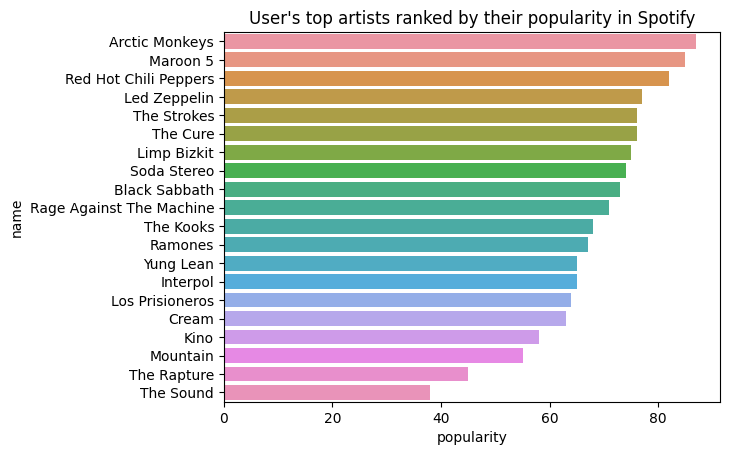

In [30]:
query = "SELECT * FROM user_top_artists ORDER BY popularity DESC;"
artists_df = pd.read_sql_query(query, conn)

sns.barplot(data=artists_df, x=artists_df["popularity"], y=artists_df["name"]).set(title="User's top artists ranked by their popularity in Spotify")

[Text(0.5, 1.0, "User's top artists amount of associated genres")]

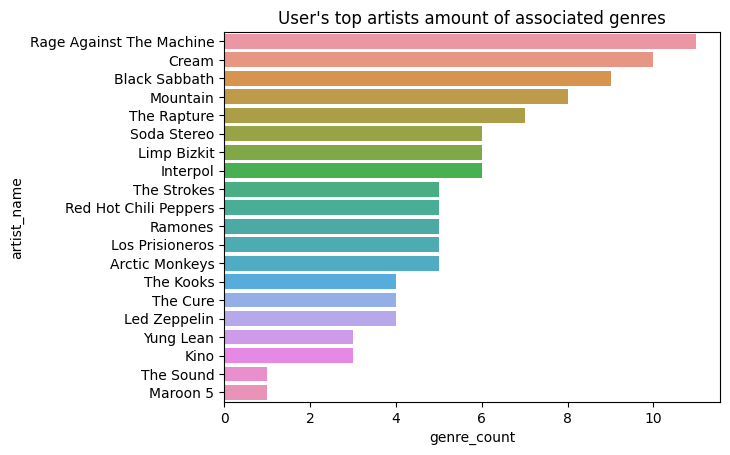

In [31]:
query = """
SELECT a.name AS artist_name, COUNT(ag.genre_id) AS genre_count
FROM user_top_artists AS a
JOIN user_top_artists_genres AS ag ON a.id = ag.artist_id
GROUP BY a.name
ORDER BY genre_count DESC;
"""

artists_genres_count_df = pd.read_sql_query(query, conn)

sns.barplot(data=artists_genres_count_df, y=artists_genres_count_df["artist_name"], x=artists_genres_count_df["genre_count"]).set(title="User's top artists amount of associated genres")

<Axes: xlabel='popularity', ylabel='name'>

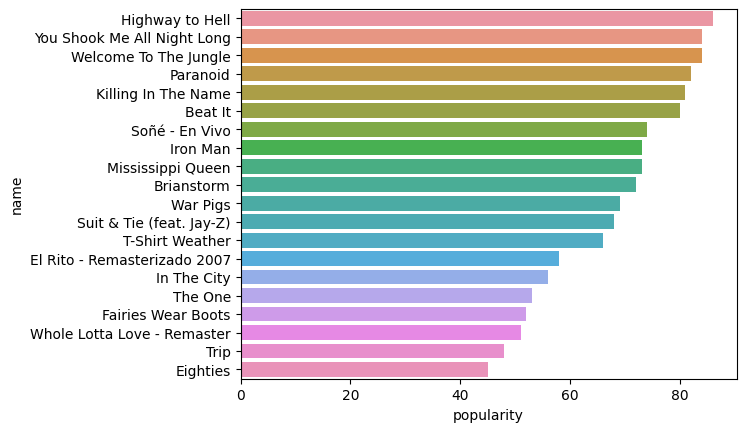

In [32]:
query = """
SELECT name, popularity
FROM user_top_songs
ORDER BY popularity DESC;
"""

top_songs_df = pd.read_sql_query(query, conn)

sns.barplot(data=top_songs_df, x=top_songs_df["popularity"], y=top_songs_df["name"])